In [1]:
from collections import defaultdict

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# from matplotlib import rcParams
# import matplotlib.cm as cm
# import matplotlib as mpl

from scipy import spatial
import timeit
from sklearn.metrics import mean_squared_error

from sklearn import datasets, linear_model

import random

In [2]:
X_train = pd.read_csv("../feature/X_train.csv")
y_train = pd.read_csv("../feature/y_train.csv")


In [3]:
X_val = pd.read_csv("../feature/X_val.csv")
y_val = pd.read_csv("../feature/y_val.csv")

X_test = pd.read_csv("../feature/X_test.csv")

In [4]:
X_train = pd.concat([X_train, X_val], ignore_index=True)
y_train = pd.concat([y_train, y_val], ignore_index=True)

print(X_train.shape, '\n')
print(X_train.columns)

(200309, 59) 

Index(['user_id', 'business_id', 'average_stars', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'cool', 'fans', 'funny', 'review_count_x',
       'useful', 'date_since', 'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_ByAppointmentOnly',
       'attributes_Caters', 'attributes_CoatCheck', 'attributes_Corkage',
       'attributes_DogsAllowed', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_Restaurants

In [5]:
# print(X_train.shape, '\n')
print(X_train.columns)

# pd.options.display.max_columns = X_train.shape[1]
# X_train.describe()

Index(['user_id', 'business_id', 'average_stars', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'cool', 'fans', 'funny', 'review_count_x',
       'useful', 'date_since', 'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_BYOB',
       'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_ByAppointmentOnly',
       'attributes_Caters', 'attributes_CoatCheck', 'attributes_Corkage',
       'attributes_DogsAllowed', 'attributes_DriveThru',
       'attributes_GoodForDancing', 'attributes_GoodForKids',
       'attributes_HappyHour', 'attributes_HasTV', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 'attri

In [6]:
drop_cols = [
    'user_id', 'business_id',
    'date_since',
    'attributes_BYOB',
    'state'
]

X_cols = list(set(X_train.columns.tolist()) - set(drop_cols))

# use_cols = [
#     'average_stars',
#     'stars'
# ]

# X_cols = use_cols

print(X_cols)

['attributes_GoodForKids', 'attributes_WheelchairAccessible', 'attributes_Corkage', 'attributes_ByAppointmentOnly', 'attributes_RestaurantsDelivery', 'stars', 'cool', 'compliment_cute', 'attributes_DogsAllowed', 'cate_Restaurants', 'compliment_list', 'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_HappyHour', 'compliment_note', 'attributes_AcceptsInsurance', 'attributes_CoatCheck', 'compliment_hot', 'attributes_RestaurantsReservations', 'review_count_y', 'attributes_GoodForDancing', 'attributes_BusinessAcceptsCreditCards', 'attributes_RestaurantsAttire', 'attributes_BusinessAcceptsBitcoin', 'attributes_NoiseLevel', 'useful', 'attributes_RestaurantsTableService', 'attributes_DriveThru', 'is_open', 'attributes_Open24Hours', 'compliment_funny', 'compliment_cool', 'review_count_x', 'funny', 'average_stars', 'compliment_writer', 'attributes_RestaurantsGoodForGroups', 'cate_Travel', 'attributes_HasTV', 'attributes_RestaurantsPriceRange2', 'attributes_OutdoorSeating', 'attributes_

In [7]:
# def rearrange_filter_data(X_df, y_df, user_cv, biz_cv, X_cols):
    
#     X_temp = X_df[(X_df['review_count_x']>=user_cv) & (X_df['review_count_y']>=biz_cv)]
#     y_temp = y_df.iloc[X_temp.index.values]
#     #print(X_temp.index == y_temp.index)
    
#     X_arr = X_temp[X_cols].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else 0.0).values
#     y_arr = y_temp['stars'].values
    
#     return X_arr, y_arr
    
# def filter_data(X_df, y_df, user_cv, biz_cv):
    
#     X_temp = X_df[(X_df['review_count_x']>=user_cv) & (X_df['review_count_y']>=biz_cv)]
#     y_temp = y_df.iloc[X_temp.index.values]
#     #print(X_temp.index == y_temp.index)
    
#     X_temp = X_temp.reset_index(drop=True)
#     y_temp = y_temp.reset_index(drop=True)
    
#     dt = {}
#     min_len = y_temp.shape[0]
#     rs = [1.0, 2.0, 3.0, 4.0, 5.0] # do not consider 0.0
#     for r in rs:
#         temp = y_temp.index[y_temp['stars'] == r].values.tolist()
#         if len(temp) < min_len:
#             min_len = len(temp)
#         dt[r] = temp
#         #print(len(dt[r]))
    
#     ls = []
#     ratio = 0.8
#     take = round(ratio * min_len)
#     for r in rs:
#         temp = random.sample(dt[r], take)
#         #print(len(dt[r]), len(temp))
#         ls = ls + temp
        
#     indices = np.array(ls)
#     #print(indices)
    
#     X_temp = X_temp.iloc[indices] # pandas dataframe
#     y_temp = y_temp.iloc[indices] # pandas dataframe
#     #print(X_temp.index == y_temp.index)
#     return X_temp, y_temp
    
def rearrange_data(X_df, y_df, X_cols):
    
    #X_arr = X_df[X_cols].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) if np.max(x) != np.min(x) else 0.0).values
    X_arr = X_df[X_cols]
    
    y_arr = y_df['stars'].values
    
    return X_arr, y_arr
    

(200309, 59) <class 'pandas.core.frame.DataFrame'> (200309, 54)
(200309, 1) <class 'numpy.ndarray'> (200309,)


(array([12972.,     0., 17215.,     0.,     0., 35449.,     0., 67773.,
            0., 66900.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

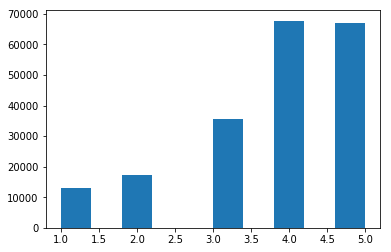

In [8]:
# X_temp, y_temp = filter_data(X_train, y_train, 500, 500)
# X, y           = rearrange_data(X_temp, y_temp, X_cols)
X, y           = rearrange_data(X_train, y_train, X_cols)

print(X_train.shape, type(X), X.shape)
print(y_train.shape, type(y), y.shape)

plt.hist(y)

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

In [10]:
# Train the model using the training sets
regr.fit(X, y)

/Users/phoenix/anaconda3/envs/.env/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
def run(X_df, y_df):
    
    X, y = rearrange_data(X_df, y_df, X_cols)
    
    expected = y
    predicted = regr.predict(X)

    rmse = np.sqrt(mean_squared_error(expected, predicted))
    print('rmse:', rmse)

    plt.figure(1)
    plt.subplot(211)
    plt.hist(predicted)
    plt.subplot(212)
    plt.hist(expected)


rmse: 1.1801461309448003


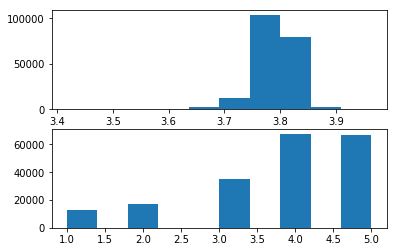

In [12]:
run(X_train,y_train)

rmse: 1.2639615474407975


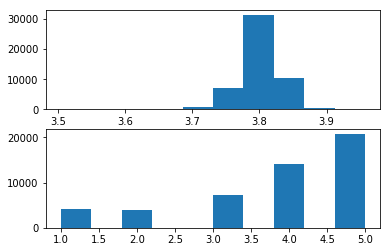

In [13]:
run(X_val,y_val)

In [12]:
X = X_test[X_cols]
y_pd = regr.predict(X)

In [120]:
df = pd.DataFrame(y_pd, columns = {'stars'})

In [121]:
df.to_csv("./X_test_output_lr.csv", index_label='index')